In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
sns.set()

In [3]:
df = pd.read_csv('reviews_output.csv')
df

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"
...,...,...,...,...,...,...,...,...,...
194434,A1YMNTFLNDYQ1F,B00LORXVUE,eyeused2loveher,"[0, 0]",Works great just like my original one. I reall...,5,This works just perfect!,1405900800,"07 21, 2014"
194435,A15TX8B2L8B20S,B00LORXVUE,Jon Davidson,"[0, 0]",Great product. Great packaging. High quality a...,5,Great replacement cable. Apple certified,1405900800,"07 21, 2014"
194436,A3JI7QRZO1QG8X,B00LORXVUE,Joyce M. Davidson,"[0, 0]","This is a great cable, just as good as the mor...",5,Real quality,1405900800,"07 21, 2014"
194437,A1NHB2VC68YQNM,B00LORXVUE,Nurse Farrugia,"[0, 0]",I really like it becasue it works well with my...,5,I really like it becasue it works well with my...,1405814400,"07 20, 2014"


In [4]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'Rating',
       'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [5]:
df.dtypes

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
Rating             int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

In [6]:
df.shape

(194439, 9)

In [7]:
df.isnull().any()

reviewerID        False
asin              False
reviewerName       True
helpful           False
reviewText         True
Rating            False
summary            True
unixReviewTime    False
reviewTime        False
dtype: bool

In [9]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      3525
helpful              0
reviewText          99
Rating               0
summary              1
unixReviewTime       0
reviewTime           0
dtype: int64

In [24]:
df_no_mv=df.dropna(subset=['reviewerName', 'reviewText', 'summary'], axis=0)

In [28]:
df_no_mv.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
Rating            0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [36]:
df_no_mv.drop('unixReviewTime',axis=1,inplace=True)

In [38]:
df_no_mv.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'Rating',
       'summary', 'reviewTime'],
      dtype='object')

In [72]:
df_no_mv.duplicated().sum()

0

In [74]:
df_no_mv['Rating'].value_counts()

Rating
5    106508
4     39285
3     21070
1     13067
2     10884
Name: count, dtype: int64

In [76]:
# Step 1: Check how many reviews have conflicting ratings
conflict_counts = (
    df_no_mv.groupby('reviewText')['Rating']
      .nunique()
      .reset_index()
      .rename(columns={'Rating': 'unique_ratings'})
)

In [92]:
# Filter original df for only conflicting reviews
conflict_df = df_no_mv[df_no_mv['reviewText'].isin(conflicting_reviews)]

# Group by reviewText to see all associated ratings
conflict_summary = conflict_df.groupby('reviewText')['Rating'].unique().reset_index()

# Optional: Show a few rows
conflict_summary.head(10)


,reviewText,Rating
0,#NAME?,"[4, 5, 3, 2]"
1,GOOD,"[5, 3]"
2,Good,"[4, 5]"
3,Good case,"[4, 5]"
4,Good product,"[4, 5]"
5,I bought the case for the wrong note. But I ha...,"[4, 3]"
6,I like it,"[4, 5]"
7,I love it,"[5, 4]"
8,Like it,"[4, 5]"
9,Love it,"[1, 5, 4]"


In [94]:
# Step 3: Remove those reviews from the main DataFrame
df_cleaned = df_no_mv[~df_no_mv['reviewText'].isin(conflicting_reviews)]

In [96]:
# Result: no same review text with different ratings
print(f"Original dataset size: {len(df_no_mv)}")
print(f"Cleaned dataset size: {len(df_cleaned)}")

Original dataset size: 190814
Cleaned dataset size: 190708


In [98]:
# Confirm no conflicts remain
check = df_cleaned.groupby('reviewText')['Rating'].nunique()
print("Max unique ratings per reviewText:", check.max())  # Should be 1


Max unique ratings per reviewText: 1


In [102]:
df_cleaned['Rating'].value_counts()

Rating
5    106451
4     39249
3     21060
1     13066
2     10882
Name: count, dtype: int64

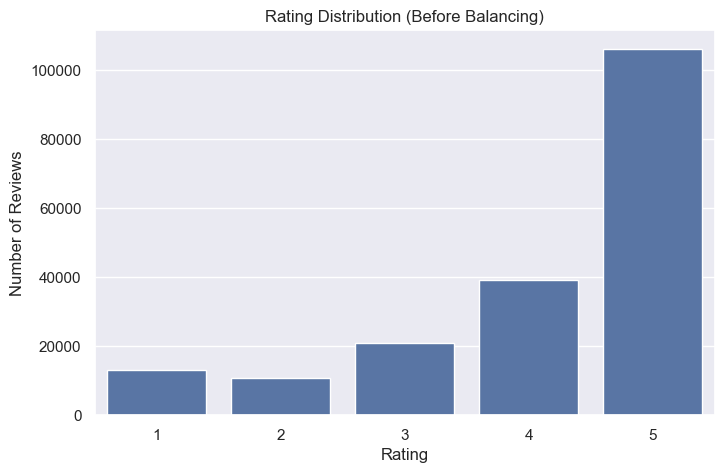

In [142]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df_cleaned)
plt.title("Rating Distribution (Before Balancing)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

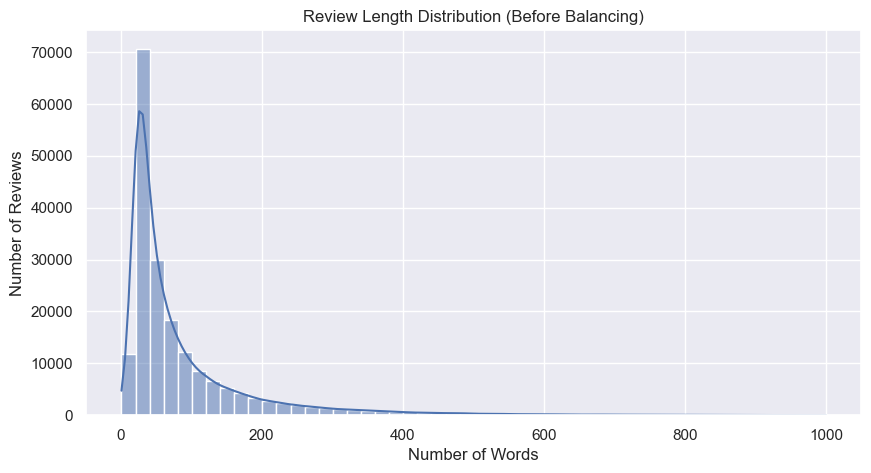

In [140]:
df_cleaned['review_length'] = df_cleaned['reviewText'].str.split().str.len()

plt.figure(figsize=(10, 5))
sns.histplot(data=df_cleaned, x='review_length', bins=50, kde=True)
plt.title("Review Length Distribution (Before Balancing)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()


In [126]:
df_filtered = df_cleaned[
    (df_cleaned['review_length'] > 10) & 
    (df_cleaned['review_length'] <= 1000)
]

In [128]:
print("Before filtering:", len(df_cleaned))
print("After filtering:", len(df_filtered))


Before filtering: 190167
After filtering: 188410


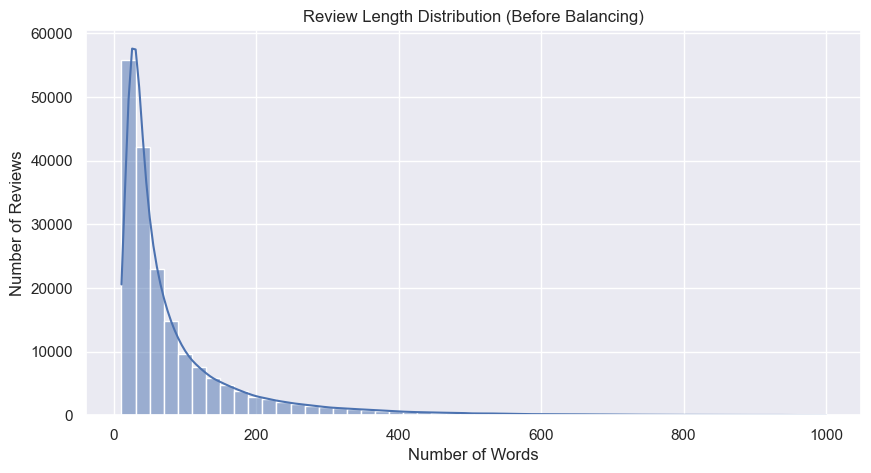

In [144]:
df_cleaned['review_length'] = df_filtered['reviewText'].str.split().str.len()

plt.figure(figsize=(10, 5))
sns.histplot(data=df_cleaned, x='review_length', bins=50, kde=True)
plt.title("Review Length Distribution (Before Balancing)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()


In [134]:
df_filtered['Rating'].value_counts()

Rating
5    105022
4     38836
3     20846
1     12917
2     10789
Name: count, dtype: int64

In [146]:
# Target count is the size of the minority class
target_count = df_filtered['Rating'].value_counts().min()  # 10789

# Balance all classes to target_count
df_balanced = (
    df_filtered.groupby('Rating', group_keys=False)
               .apply(lambda x: x.sample(target_count, random_state=42))
               .sample(frac=1, random_state=42)
               .reset_index(drop=True)
)

# Check balanced result
print(df_balanced['Rating'].value_counts())

Rating
3    10789
5    10789
4    10789
1    10789
2    10789
Name: count, dtype: int64


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_13064\4114404160.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(target_count, random_state=42))


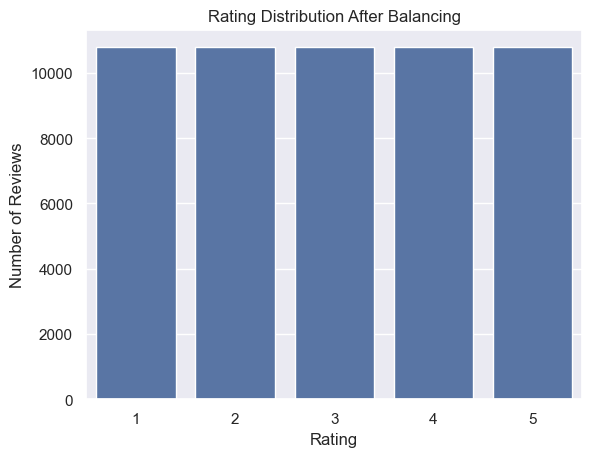

In [148]:
sns.countplot(x='Rating', data=df_balanced)
plt.title("Rating Distribution After Balancing")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

In [152]:
df_balanced.to_csv('balanced_reviews.csv', index=False)